<a href="https://colab.research.google.com/github/evrimakgul/MSDS_Data_Engineering/blob/master/Deep_Learning_'Hello_MNIST'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A tutorial introduction into deep learning with Keras and Tensorflow.  We will use the MNIST dataset which is the 'Hello world' problem of deep learning

I always like to start my jupternotebooks with this code because it fits the display window to my screen.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### This tutrial was adapted from Deep Learning with Python Chapter 2 Chollet, F. (2017). Deep Learning with Python (1st ed.). Greenwich, CT, USA: Manning Publications Co.

Start with some definitions.
Numerical data in an array are called tensors.  https://en.wikipedia.org/wiki/Tensor.

Scalars are 0 dimensional tensors (a single digit). 

In [2]:
import numpy as np
x = np.array(12)
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 0 dimensions

The value of x is 12
The dimension of this tensor is 0


A 1 dimensional tensor is also called a vector

In [3]:
x = np.array([12, 1, 2, 3]) #create a vector
print('The value of x is', x)
print('The dimention of this tensor is', x.ndim) # 1 dimensions

The value of x is [12  1  2  3]
The dimention of this tensor is 1


A 2 dimensional tensor is also called a matrix

In [4]:
x = np.array([[12, 1, 2, 3],
              [5, 6, 7, 8,],
              [10, 11, 12, 12]])
print('The value of x is', x) # Print the 3 x 4 matrix
print('The dimension of this tensor is', x.ndim) # 2 dimensions

The value of x is [[12  1  2  3]
 [ 5  6  7  8]
 [10 11 12 12]]
The dimension of this tensor is 2


We can create n dimensional tensors easily, although they become difficult to visualize.
This 3D tensor is like a cube of data.  

In [5]:
x = np.array([[[12, 1, 2, 3],
               [5, 6, 7, 8,],
               [10, 11, 12, 12]],
              [[2, 2, 2, 2,],
               [3,3,3,3],
               [4,4,4,4]],
              [[5,5,5,5],
               [6,6,6,6],
               [7,7,7,7]]])
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 3 dimensional array

The value of x is [[[12  1  2  3]
  [ 5  6  7  8]
  [10 11 12 12]]

 [[ 2  2  2  2]
  [ 3  3  3  3]
  [ 4  4  4  4]]

 [[ 5  5  5  5]
  [ 6  6  6  6]
  [ 7  7  7  7]]]
The dimension of this tensor is 3


#### Reshaping tensors is important concept to understand.  We can reshape a tensor as long as it has the same number of coefficients as the initial tensor.

In [6]:
x = x.reshape(1, 3*3*4)
print(x)
x = x.reshape(4, 9)
print(x)

[[12  1  2  3  5  6  7  8 10 11 12 12  2  2  2  2  3  3  3  3  4  4  4  4
   5  5  5  5  6  6  6  6  7  7  7  7]]
[[12  1  2  3  5  6  7  8 10]
 [11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5]
 [ 5  6  6  6  6  7  7  7  7]]


##### Tensors have three atributes: number of axis (dimensions), shape (length of each axis), and data type (typically we will use float32)

Load the MNIST library which is part of Keras.  MNIST stands for Modified National Institute of Technology. https://en.wikipedia.org/wiki/MNIST_database. It is a collection of 60,000 training and 10,000 test images of the digits 0-9. https://keras.io/datasets/. We will build a deep learning nerual net model to classify the 10 digits. This is the 'Hello World' problem of deep learning. 

In [7]:
# Tensorflow recently upgraded to 2.0. Tenserflow 2.0 is not default yet in Google Colabs but this line of code will intialize Tensorflow 2.x
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [10]:
train_images.shape #60,000 images that are 28 pixles by 28 pixles

(60000, 28, 28)

In [11]:
train_images.ndim #3D tensor

3

In [12]:
print('The maximum value in the array is', train_images.max()) # The maximum value in the array is 255
print('he minimum value in the array is', train_images.min()) # The minimum value in the array is 0

The maximum value in the array is 255
he minimum value in the array is 0


In [0]:
# Get the shape, dimensions, max and min value of the test images

In [14]:
print('test image shape:', test_images.shape)
print('number of dimensions:', test_images.ndim)
print('maximum value', test_images.max())
print('minimum value:', test_images.min())

test image shape: (10000, 28, 28)
number of dimensions: 3
maximum value 255
minimum value: 0


In general the first axis in a tensor is the samples, the second axis is height, the third axis is the width, and the fourth is color channels (RGB = 3 & BW = 1)
So image data will be a 4D tensor [samples, height, width, channels] the MNIST data is 3D bacause the color channel is black and white and thus = 1
Video data will be a 5D tensor [samples, frames, height, width, channels]. By convention, time series data will be placed on the secod axis when present

Let's view one of the images.  We need to import matplotlib to view the digits 

In [0]:
import matplotlib.pyplot as plt

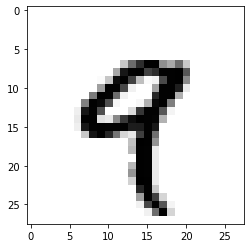

In [16]:
digit = train_images[4] # Select the fouth sample.
plt.imshow(digit, cmap=plt.cm.binary) # Show the sample.  cmap is the color map.  We will keep it black and white (binary)
plt.show()

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [20]:
train_images =  train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/train_images.max()

print(train_images.ndim)

test_images =  test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/test_images.max()

2


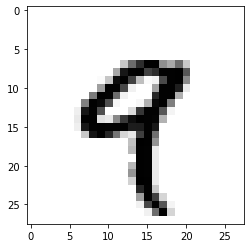

In [21]:
plt.imshow(train_images.reshape((60000,28,28))[4], cmap=plt.cm.binary)

In [22]:
print('train image shape:', train_images.shape)
print('number of dimensions:', train_images.ndim)
print('maximum value', train_images.max())
print('minimum value:', train_images.min())

train image shape: (60000, 784)
number of dimensions: 2
maximum value 1.0
minimum value: 0.0


In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 120) # Batch size is how many images to process at once. Epoch is how many times to repeat the analysis.  Each epoch performs 500 gradient updates (60,000/120 = 500)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2614 - accuracy: 0.9264
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1045 - accuracy: 0.9699
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0693 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0485 - accuracy: 0.9863
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0365 - accuracy: 0.9893


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0643 - accuracy: 0.9793
test_acc: 0.9793


# Your Turn
####  Build 3 different models with activations 'relu', 'tanh', and 'sigmoid'.  The last activation must be 'softmax' since we have a multiclass problem

In [0]:
relu_model = models.Sequential()
relu_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
relu_model.add(layers.Dense(10, activation='softmax'))

tanh_model = models.Sequential()
tanh_model.add(layers.Dense(512, activation='tanh',input_shape=(28 * 28,)))
tanh_model.add(layers.Dense(10, activation='softmax'))


sigmoid_model = models.Sequential()
sigmoid_model.add(layers.Dense(512, activation='sigmoid',input_shape=(28 * 28,)))
sigmoid_model.add(layers.Dense(10, activation='softmax'))

#### Compile your model.  Use categorical_crossentropyy since this problem is a multiclassification problem. Metrics will be 'accuracy' and optimizer will be 'adam'.

In [0]:
relu_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

tanh_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

sigmoid_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [29]:
relu_model.fit(train_images, train_labels, epochs = 5, batch_size = 150)
tanh_model.fit(train_images, train_labels, epochs = 5, batch_size = 150)
sigmoid_model.fit(train_images, train_labels, epochs = 5, batch_size = 150)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2758 - accuracy: 0.9216
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1115 - accuracy: 0.9678
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0723 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0534 - accuracy: 0.9838
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0391 - accuracy: 0.9883
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3331 - accuracy: 0.9028
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1857 - accuracy: 0.9461
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1265 - accuracy: 0.9639
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0950 - accuracy: 0.9728


#### Test the accuracy of the model on the test images and test labels.

In [30]:
test_loss, test_acc = relu_model.evaluate(test_images, test_labels)
print('relu_test_acc:', test_acc)

test_loss, test_acc = tanh_model.evaluate(test_images, test_labels)
print('tanh_test_acc:', test_acc)

test_loss, test_acc = sigmoid_model.evaluate(test_images, test_labels)
print('sigmoid_model_test_acc:', test_acc)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.0685 - accuracy: 0.9790
relu_test_acc: 0.979
10000/10000 [==============================] - 1s 71us/sample - loss: 0.0842 - accuracy: 0.9745
tanh_test_acc: 0.9745
10000/10000 [==============================] - 1s 71us/sample - loss: 0.1334 - accuracy: 0.9593
sigmoid_model_test_acc: 0.9593


#### which activation gave the highest accuracy?
_relu activation function converges faster (see values after first epoch: 0.9213 vs 0.9026 vs 0.8740). Hence, It gives better accuracy at the test data._
### Using the acitvation that gave the highest accuracy build 3 different models with 3 hidden layers and varying units in each hidden layer.  The first and output layers are given to you.

In [0]:
h1_model = models.Sequential()
h1_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(10, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(10, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(10, activation='softmax'))

h2_model = models.Sequential()
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(10, activation='softmax'))


h3_model = models.Sequential()
h3_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(256, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(128, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(64, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(10, activation='softmax'))

#### Complie the three models

In [0]:
h1_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

h2_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

h3_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [33]:
h1_model.fit(train_images, train_labels, epochs = 5, batch_size = 150)
h2_model.fit(train_images, train_labels, epochs = 5, batch_size = 150)
h3_model.fit(train_images, train_labels, epochs = 5, batch_size = 150)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4791 - accuracy: 0.8470
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1222 - accuracy: 0.9651
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0779 - accuracy: 0.9772
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0560 - accuracy: 0.9826
Epoch 5/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0404 - accuracy: 0.9873
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2232 - accuracy: 0.9326
Epoch 2/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0865 - accuracy: 0.9733
Epoch 3/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0603 - accuracy: 0.9809
Epoch 4/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0473 - accuracy:

#### Test the accuracy of the 3 models

In [34]:
test_loss, test_acc = h1_model.evaluate(test_images, test_labels)
print('h1_model_test_acc:', test_acc)

test_loss, test_acc = h2_model.evaluate(test_images, test_labels)
print('h2_model_test_acc:', test_acc)

test_loss, test_acc = h3_model.evaluate(test_images, test_labels)
print('h3_model_model_model_test_acc:', test_acc)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0825 - accuracy: 0.9758
h1_model_test_acc: 0.9758
10000/10000 [==============================] - 1s 133us/sample - loss: 0.0757 - accuracy: 0.9791
h2_model_test_acc: 0.9791
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0750 - accuracy: 0.9802
h3_model_model_model_test_acc: 0.9802


#### Which model gave the highest accuracy?

My last (3rd) model seems to best the others, but the difference between 2nd and 3rd models is very small. To make sure that it actually would be a case or not requires many repetetion of the test and comparision of the averages of those tests.